У цьому ДЗ ми попрактикуємось моделювати часові ряди на даних з [Store Item Demand Forecasting Challenge](https://www.kaggle.com/competitions/demand-forecasting-kernels-only/overview). Ми будемо працювати лише з тренувальними даними цього змагання і задача у нас буде дещо змінена. Фокус буде на пошуці найкращої моделі, експериментах і використанні функціоналу `darts`.

Якщо якісно попрацювати в цьому завданні - це буде чудовий приклад проєкту для вашого портфоліо: "спрогнозував(-ла) поденні продажі на 1 міс для 50 товарів в 10 магазинах" звучить вражаюче! Але ми в рамках ДЗ для оптимізації часу сконцентруємось на моделюванні продажів одного товару в одному магазині.

**Задача**

Вам надано дані про продажі товарів у магазинах за 5 років. Хочемо навчитись передачати продажі в наступному місяці поденно кожного з 50 товарів у кожному з 10 магазинів. Відповідно будемо проводити експерименти, аби знайти найкращу модель для цього.

На відміну від змагання, ми будемо використовувати метрику МАРЕ (Mean Absolute Percentage Error) замість SMAPE (Symmetric Mean Absolute Percentage Error). Проте, ви також можете розрахувати SMAPE і подати свої результати через late submission на Kaggle.

1. Завантажуємо дані в Pandas.

  1. Завантажте дані з файлу `train.csv.zip` за допомогою бібліотеки Pandas.
  2. Перетворіть колонку `date` на формат `datetime`.
  3. Встановіть колонку `date` як індекс для датафрейму.
  4. Виведіть перші 10 рядків отриманого датафрейму та інформацію про датафрейм.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

Mounted at /content/drive


In [2]:
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
# Перетворення колонки 'date' на формат datetime
train_df['date'] = pd.to_datetime(train_df['date'])

# Встановлення колонки 'date' як індекс
train_df.set_index('date', inplace=True)

# Виведення перших 10 рядків датафрейму
print(train_df.head(10))

# Виведення інформації про датафрейм
print(train_df.info())

            store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10
2013-01-06      1     1     12
2013-01-07      1     1     10
2013-01-08      1     1      9
2013-01-09      1     1     12
2013-01-10      1     1      9
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB
None


  2. Давайте трошки зрозуміємо дані. У нас 10 магазинів і 50 айтемів в кожному. Хочемо зрозуміти, чи відрізняється динаміка по кожному айтему в магазинах. Як би ви це візуалізували? Побудуйте 3 графіка, які вам допоможуть. Можна використати будь-який інструмент: matplotlib, seaborn, plotly.

  Напишіть висновок з побудованих вами візуалізацій.
  
    **Підказка**: я б спробувала вивести середнє значення і довірчий інтервал (який включає весь діапазон значень з різних магазинів) для динаміки кожного айтема, або принаймні для декількох айтемів, аби зрозуміти тенденцію.



<ipython-input-4-c03bf040b3b4>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_df, x='date', y='sales', hue='item', estimator='mean', ci=None)


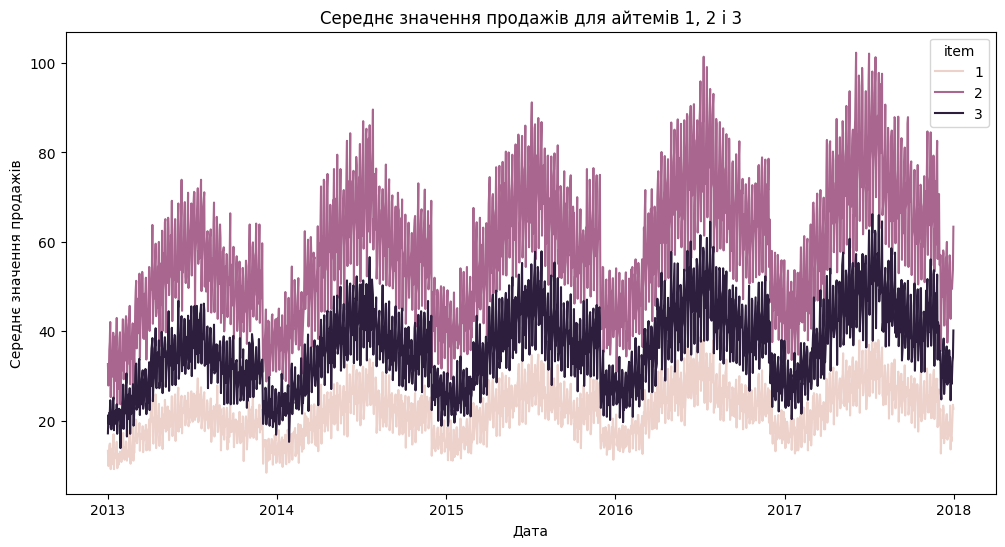

<ipython-input-4-c03bf040b3b4>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=filtered_df, x='date', y='sales', hue='item', estimator='mean', ci='sd')


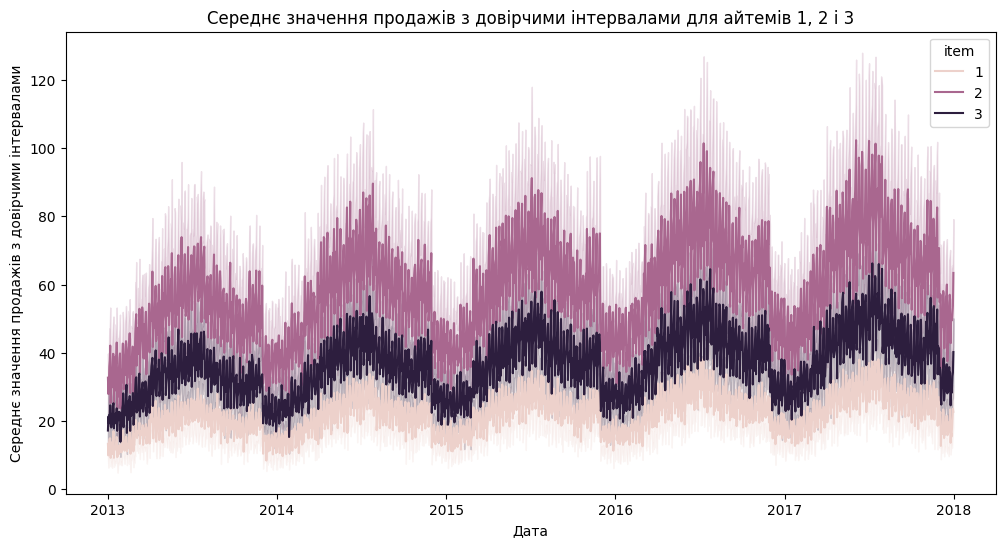

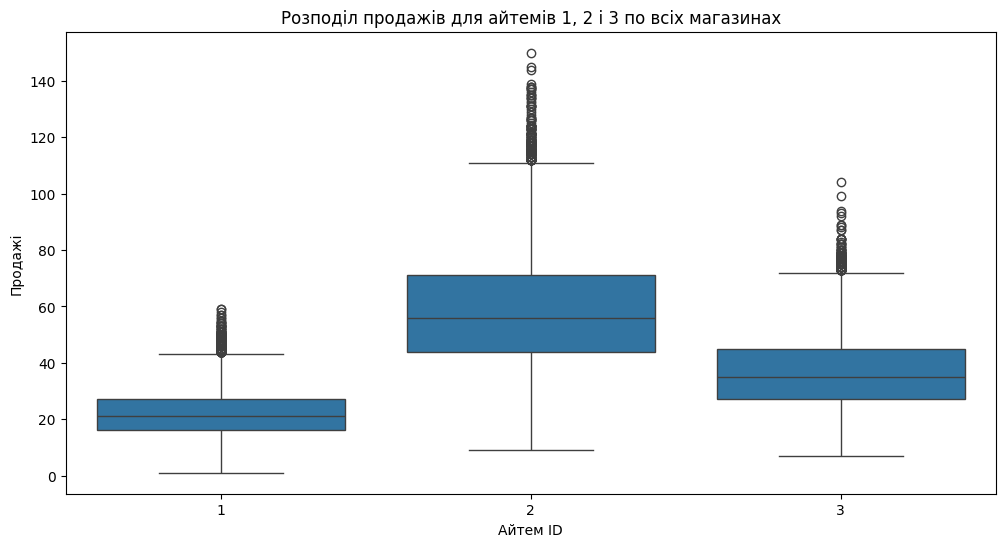

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Лімітуємо дані для кількох айтемів (наприклад, айтеми з ID 1, 2 і 3)
filtered_df = train_df[train_df['item'].isin([1, 2, 3])]

# Графік 1: Середнє значення продажів для айтемів
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='sales', hue='item', estimator='mean', ci=None)
plt.title('Середнє значення продажів для айтемів 1, 2 і 3')
plt.xlabel('Дата')
plt.ylabel('Середнє значення продажів')
plt.show()

# Графік 2: Середнє значення і довірчий інтервал для айтемів
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='sales', hue='item', estimator='mean', ci='sd')
plt.title('Середнє значення продажів з довірчими інтервалами для айтемів 1, 2 і 3')
plt.xlabel('Дата')
plt.ylabel('Середнє значення продажів з довірчими інтервалами')
plt.show()

# Графік 3: Boxplot для айтемів
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='item', y='sales')
plt.title('Розподіл продажів для айтемів 1, 2 і 3 по всіх магазинах')
plt.xlabel('Айтем ID')
plt.ylabel('Продажі')
plt.show()

З усіх графіків видно, що продажі щорічно дещо зростають та мають певну сезонність. Найкращим товаром за продажами є айтем 2, а сезоном приблизно літо і, можливо, трохи грудневі свята.

3. **Для початку проаналізуємо лише один ряд, а далі зможемо зациклити тренування моделей.**
  
  Виберіть підмножину даних, що відповідає продажам товару з `item == 1` у магазині з `store == 1`.

  Зробіть декомпозицію цього рядку за адитивною моделлю на тренд, сезонність і залишки з бібліотекою `statsmodels`.

  Зробіть висновки з отриманих візуалізацій. Чи щось би могло вам допомогти ліпше зрозуміти ці візуалізації? (з точки зору обробки даних)

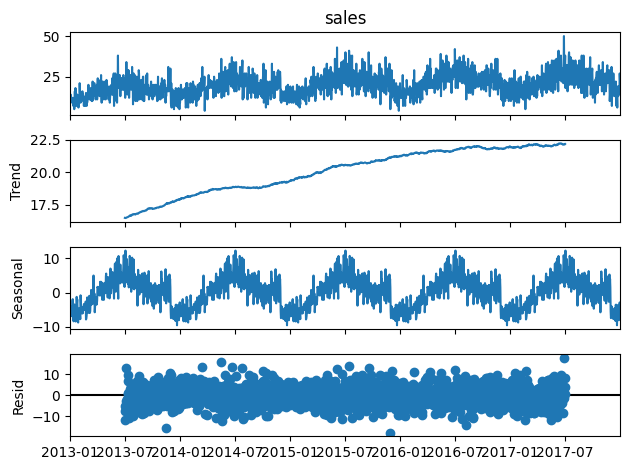

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Фільтруємо дані для item == 1 і store == 1
subset_df = train_df[(train_df['item'] == 1) & (train_df['store'] == 1)]

# Перевіряємо наявність пропущених значень та сортуємо дані за датою
subset_df = subset_df.dropna().sort_values('date')

# Робимо декомпозицію за адитивною моделлю (період потрібно вибрати відповідно до сезонності даних)
result = seasonal_decompose(subset_df['sales'], model='additive', period=365)

# Візуалізація компонентів декомпозиції
result.plot()
plt.show()

**Sales**
Спостерігаються регулярні коливання у продажах, із явними піками та спадами. Це свідчить про наявність певної сезонності в даних. Водночас спостерігається загальна тенденція до збільшення продажів.

**Тренд**
Тренд показує стійке зростання продажів з часом. Це може бути результатом зростання популярності товару або збільшення кількості клієнтів у магазині. Тренд згладжує короткострокові коливання і показує довгострокову динаміку.

**Сезонність**
На сезонному компоненті чітко видно повторювані щорічні цикли. Це вказує на те, що продажі піддаються впливу сезонних факторів (наприклад, підвищений попит під час свят або зростання продажів у певні місяці).
Ці цикли схожі за амплітудою і періодичністю, що дозволяє зробити висновок про стабільну сезонність протягом всього аналізованого періоду.

**Залишки (Residuals)**
Залишки не демонструють якоїсь явної структури, що є хорошим знаком, оскільки вони представляють випадкові коливання, які не можна пояснити трендом чи сезонністю.
Є кілька великих залишкових значень, що можуть свідчити про наявність аномальних подій у даних (наприклад, акції, знижки, або зовнішні чинники).

Тренд демонструє стійке зростання продажів, що є позитивним сигналом для цього товару та магазину.
Сезонність показує чітку циклічність, яка, ймовірно, відповідає річним чи іншим регулярним подіям. Рекомендовано використовувати цей патерн для прогнозування майбутніх продажів.
Залишки є здебільшого випадковими, що свідчить про адекватну модель, однак варто дослідити аномалії.

Можливо, варто проаналізувати аномальні залишки окремо для пошуку можливих впливів на продажі.
Також варто перевірити, чи є додаткові фактори, які могли б пояснити аномалії в продажах (наприклад, зовнішні події, святкові періоди, маркетингові акції).

4. Зі створеної підможени даних в попередньому пункті створіть обʼєкт класу `TimeSeries` в `darts` лише для колонки `sales`.

In [6]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.

In [7]:
from darts import TimeSeries
import pandas as pd
subset_df.reset_index(inplace=True)  # Якщо 'date' раніше був індексом, повертаємо його назад у колонки
subset_df['date'] = pd.to_datetime(subset_df['date'])

# Створюємо об'єкт TimeSeries для колонки 'sales'
sales_series = TimeSeries.from_dataframe(subset_df, 'date', 'sales')

# Виводимо перші кілька рядків об'єкта TimeSeries
print(sales_series)

<TimeSeries (DataArray) (date: 1826, component: 1, sample: 1)> Size: 15kB
array([[[13.]],

       [[11.]],

       [[14.]],

       ...,

       [[15.]],

       [[27.]],

       [[23.]]])
Coordinates:
  * date       (date) datetime64[ns] 15kB 2013-01-01 2013-01-02 ... 2017-12-31
  * component  (component) object 8B 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


5. Використовуючи метод `series.split_before` розбийте дані на тренування і валідацію так, аби валідація починалась з `2017-10-01` включно.

  Візуалізуйте на одному графіку тренувальну і валідаційну частину як було показано в лекції.

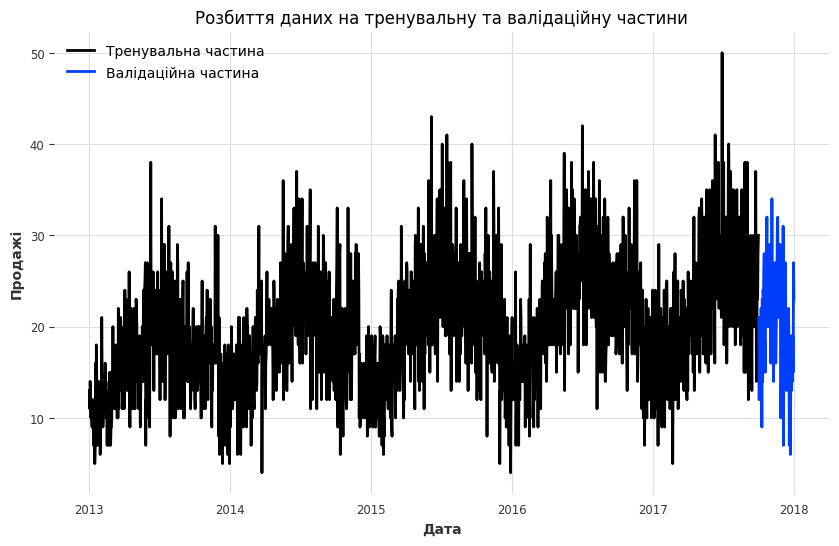

In [8]:
# Задаємо дату, з якої починається валідаційна частина
split_date = pd.Timestamp('2017-10-01')

# Розділяємо дані на тренувальну та валідаційну частини
train_series, val_series = sales_series.split_before(split_date)

# Візуалізація тренувальних і валідаційних даних
plt.figure(figsize=(10, 6))

# Графік для тренувальної частини
train_series.plot(label='Тренувальна частина')

# Графік для валідаційної частини
val_series.plot(label='Валідаційна частина')

# Додаємо легенду та підписи
plt.title('Розбиття даних на тренувальну та валідаційну частини')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

6. Побудуйте часткову автокореляційну фукнцію для цього нашого ряду в `series`. Напишіть висновки - які лаги є важливими для прогнозування?

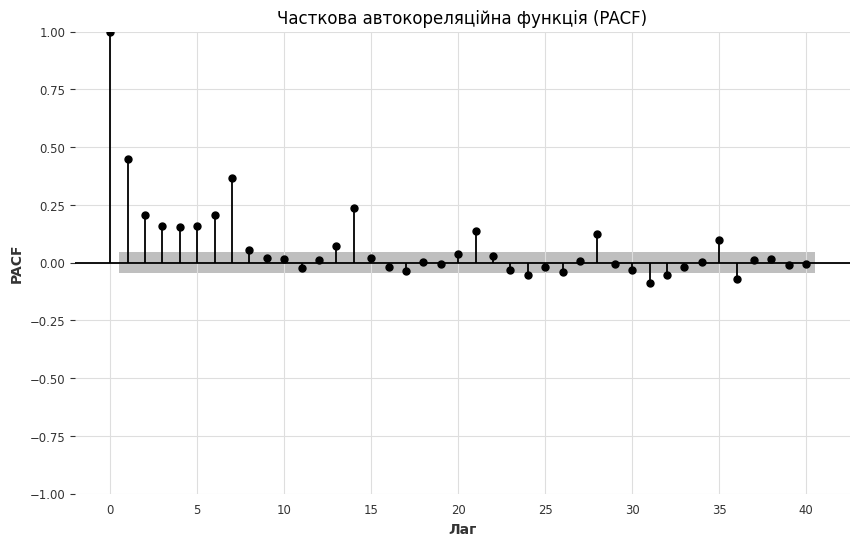

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Перетворення TimeSeries в pandas Series
sales_pd_series = sales_series.pd_series()

# Побудова PACF
plt.figure(figsize=(10, 6))
plot_pacf(sales_pd_series, lags=40, ax=plt.gca())  # Виберіть кількість лагів, яка вам потрібна
plt.title('Часткова автокореляційна функція (PACF)')
plt.xlabel('Лаг')
plt.ylabel('PACF')
plt.show()

Лаги, які виходять за межі довірчого інтервалу (показані на графіку сірим кольором навколо нульової лінії), є значущими для прогнозування. У цьому випадку, значущими є перші кілька лагів:

Лаг 1 має найбільшу значущу часткову автокореляцію, яка приблизно дорівнює 1.0.
Інші значущі лаги: 2, 3, 6, та 9, де спостерігаються невеликі підвищення, які виходять за межі довірчого інтервалу.
Значущість інших лагів: Після лагу 9, інші лаги не є значущими для моделі, оскільки їхні значення залишаються в межах довірчого інтервалу (близько нуля).

Висновок
Для прогнозування слід враховувати перші кілька лагів (особливо лаги 1, 2, 3, 6 і 9), оскільки вони мають значущі значення часткової автокореляції і можуть вносити вклад у модель прогнозування.

7. Виявіть сезональність тренувального ряду використовуючи фукнкцію `check_seasonality` з `darts`.

In [10]:
from darts.utils.statistics import check_seasonality

# Перевірка сезональності
seasonality_info = check_seasonality(sales_series)

print(seasonality_info)

(True, 7)


8. Побудуйте наївну модель NaiveSeasonal + NaieDrift для прогнозування даних. Кількість кроків для прогнозування визначіть зі свого аналізу в попередніх пунктах. Візуалізайте передбачення проти справжніх даних так, аби було видно якість передбачень. Зробіть висновок про модель. Вона точна?

  Якщо у вас є ідеї, як поліпшити якість передбачення саме наївними моделями - реалізуйте їх в цьому пункті :)

In [12]:
from darts import TimeSeries
from darts.models import NaiveSeasonal, NaiveDrift
from darts.metrics import mape
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
from darts import TimeSeries

# Загрузка даних
subset_df.reset_index(inplace=True)
subset_df['date'] = pd.to_datetime(subset_df['date'])

# Створення TimeSeries об'єкта
sales_series = TimeSeries.from_dataframe(subset_df, 'date', 'sales')

# Визначення дати для розподілу на тренувальні та валідаційні дані
split_date = pd.Timestamp('2017-10-01')
train_series, val_series = sales_series.split_before(split_date)

In [14]:
from darts.models import NaiveSeasonal, NaiveDrift

# Ініціалізація моделей
naive_seasonal_model = NaiveSeasonal()
naive_drift_model = NaiveDrift()

# Тренування моделей
naive_seasonal_model.fit(train_series)
naive_drift_model.fit(train_series)

# Прогнозування
forecast_naive_seasonal = naive_seasonal_model.predict(len(val_series))
forecast_naive_drift = naive_drift_model.predict(len(val_series))

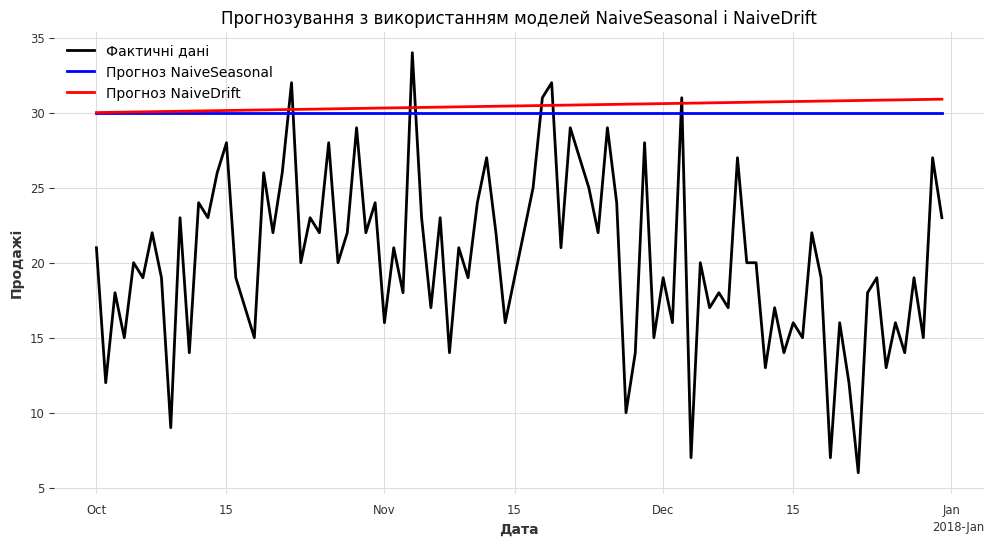

In [15]:
plt.figure(figsize=(12, 6))

# Візуалізація фактичних даних
val_series.plot(label='Фактичні дані', color='black')

# Візуалізація прогнозів
forecast_naive_seasonal.plot(label='Прогноз NaiveSeasonal', color='blue')
forecast_naive_drift.plot(label='Прогноз NaiveDrift', color='red')

plt.title('Прогнозування з використанням моделей NaiveSeasonal і NaiveDrift')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

In [16]:
from darts.metrics import mape

# Оцінка точності моделей
mape_naive_seasonal = mape(val_series, forecast_naive_seasonal)
mape_naive_drift = mape(val_series, forecast_naive_drift)

print(f'MAPE для NaiveSeasonal: {mape_naive_seasonal:.2f}%')
print(f'MAPE для NaiveDrift: {mape_naive_drift:.2f}%')

MAPE для NaiveSeasonal: 66.23%
MAPE для NaiveDrift: 68.74%


Наївні моделі демонструють високу помилку: МАПЕ понад 60% вказує на те, що прогнози моделей значно відрізняються від фактичних значень. Це свідчить про те, що ці моделі не дуже точні для ваших даних.

Причини можливої неточності:

Сезонність або тренди - моделі можуть не враховувати складні патерни сезонності або трендів у ваших даних.
Зміна в даних - можливо, дані мають нетипову поведінку або зміни в часі, які наївні моделі не можуть адекватно прогнозувати.

Можливі поліпшення
Щоб покращити точність прогнозування, ось кілька ідей та реалізацій:

In [17]:
from darts.utils.statistics import check_seasonality

# Перевірка сезонності для тренувальної серії
seasonality_info = check_seasonality(train_series)
print(seasonality_info)

(True, 7)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_b0m0y/7axb7r0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_b0m0y/z9c62p6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79528', 'data', 'file=/tmp/tmp_z_b0m0y/7axb7r0s.json', 'init=/tmp/tmp_z_b0m0y/z9c62p6n.json', 'output', 'file=/tmp/tmp_z_b0m0y/prophet_modeljbh71iqz/prophet_model-20240818201442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:14:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:14:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


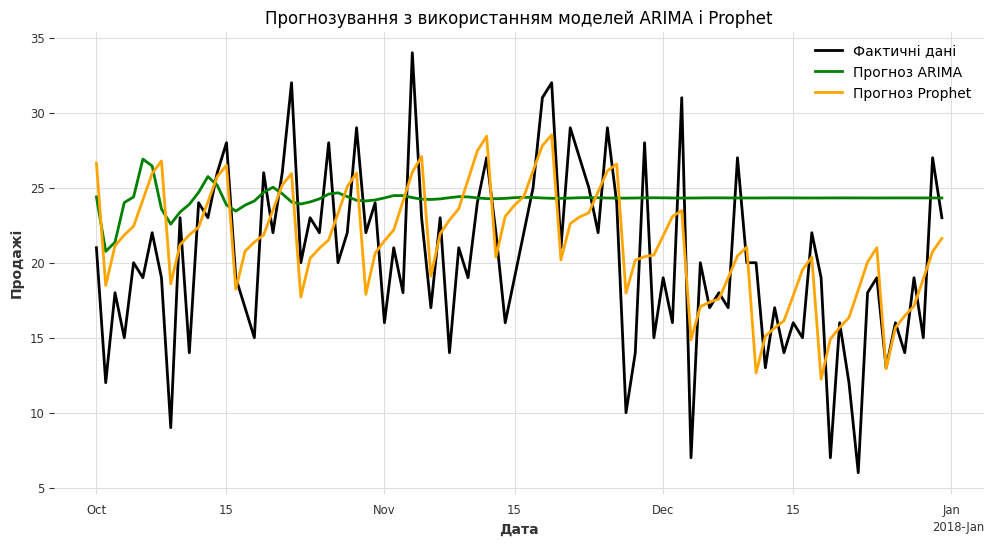

MAPE для ARIMA: 39.49%
MAPE для Prophet: 23.80%


In [18]:
from darts.models import ARIMA, Prophet

# Модель ARIMA
arima_model = ARIMA()
arima_model.fit(train_series)
forecast_arima = arima_model.predict(len(val_series))

# Модель Prophet
prophet_model = Prophet()
prophet_model.fit(train_series)
forecast_prophet = prophet_model.predict(len(val_series))

# Візуалізація результатів
plt.figure(figsize=(12, 6))

# Візуалізація фактичних даних
val_series.plot(label='Фактичні дані', color='black')

# Візуалізація прогнозів
forecast_arima.plot(label='Прогноз ARIMA', color='green')
forecast_prophet.plot(label='Прогноз Prophet', color='orange')

plt.title('Прогнозування з використанням моделей ARIMA і Prophet')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

# Оцінка точності моделей
from darts.metrics import mape

mape_arima = mape(val_series, forecast_arima)
mape_prophet = mape(val_series, forecast_prophet)

print(f'MAPE для ARIMA: {mape_arima:.2f}%')
print(f'MAPE для Prophet: {mape_prophet:.2f}%')

Висновки
Відзначається суттєве зменшення помилки прогнозування в порівнянні з наївними моделями. Обидві нові моделі — ARIMA та Prophet — демонструють значно меншу помилку.

Prophet має найнижчий MAPE (23.80%), що свідчить про те, що вона є найточнішою серед протестованих моделей. Це може бути результатом її здатності краще враховувати сезонність і тренди.

Хоча ARIMA має більший MAPE в порівнянні з Prophet (39.49%), вона все ще є набагато точнішою, ніж наївні моделі.

Можливі поліпшення
Щоб ще більше поліпшити точність прогнозування, можна спробувати наступні підходи:

Оптимізація гіперпараметрів:

Для ARIMA: Перевірити різні комбінації параметрів p, d, q, щоб знайти оптимальні значення.
Для Prophet: Налаштувати сезонність, тренди та інші параметри для досягнення ще кращих результатів.

Комбінування моделей:

Спробувати об’єднати прогнози з різних моделей. Наприклад, використовувати ансамблевий підхід або середнє прогнозування з ARIMA і Prophet.

Включення додаткових фіч:

Додати додаткові дані, які можуть вплинути на прогнози, такі як економічні індикатори, свята, акції тощо.

Додаткові перевірки сезонності та трендів:

Використовувати детальніший аналіз даних для виявлення і можливого коригування наявності сезонності та трендів.

Аналіз залишків:

Перевірити залишки моделей (різницю між прогнозом і фактичними даними) для виявлення можливих патернів або аномалій

9. Обчисліть помилку прогнозу на валідації наївною моделлю з mape. Далі для всіх моделей необхідно обчислювати помилку прогнозу на валідації.

In [19]:
from darts.metrics import mape
from darts.models import NaiveSeasonal, NaiveDrift, ARIMA, Prophet

# Ініціалізація моделей
naive_seasonal_model = NaiveSeasonal()
naive_drift_model = NaiveDrift()
arima_model = ARIMA()
prophet_model = Prophet()

# Тренування моделей
naive_seasonal_model.fit(train_series)
naive_drift_model.fit(train_series)
arima_model.fit(train_series)
prophet_model.fit(train_series)

# Прогнозування для NaiveSeasonal
forecast_naive_seasonal = naive_seasonal_model.predict(len(val_series))

# Прогнозування для NaiveDrift
forecast_naive_drift = naive_drift_model.predict(len(val_series))

# Прогнозування для ARIMA
forecast_arima = arima_model.predict(len(val_series))

# Прогнозування для Prophet
forecast_prophet = prophet_model.predict(len(val_series))

# Обчислення MAPE для кожної моделі
mape_naive_seasonal = mape(val_series, forecast_naive_seasonal)
mape_naive_drift = mape(val_series, forecast_naive_drift)
mape_arima = mape(val_series, forecast_arima)
mape_prophet = mape(val_series, forecast_prophet)

print(f'MAPE для NaiveSeasonal: {mape_naive_seasonal:.2f}%')
print(f'MAPE для NaiveDrift: {mape_naive_drift:.2f}%')
print(f'MAPE для ARIMA: {mape_arima:.2f}%')
print(f'MAPE для Prophet: {mape_prophet:.2f}%')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_b0m0y/pvl4d289.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_b0m0y/v1_4nbfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21479', 'data', 'file=/tmp/tmp_z_b0m0y/pvl4d289.json', 'init=/tmp/tmp_z_b0m0y/v1_4nbfv.json', 'output', 'file=/tmp/tmp_z_b0m0y/prophet_modelekem_ywu/prophet_model-20240818201451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:14:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE для NaiveSeasonal: 66.23%
MAPE для NaiveDrift: 68.74%
MAPE для ARIMA: 39.49%
MAPE для Prophet: 23.80%


10. Натренуйте XBGModel з `darts` для передбачення наших даних. Можна додавати всі додаткові ознаки, які вважаєте за потрібне, наприклад, ознаки з дати. Зробіть висновок про якість моделі.

            store  item  sales  year  month  day  day_of_week
date                                                         
2013-01-01      1     1     13  2013      1    1            1
2013-01-02      1     1     11  2013      1    2            2
2013-01-03      1     1     14  2013      1    3            3
2013-01-04      1     1     13  2013      1    4            4
2013-01-05      1     1     10  2013      1    5            5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:14:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "seasonality" } are not used.

  warnings.warn(smsg, UserWarning)


MAPE для XGBoost: 29.92%


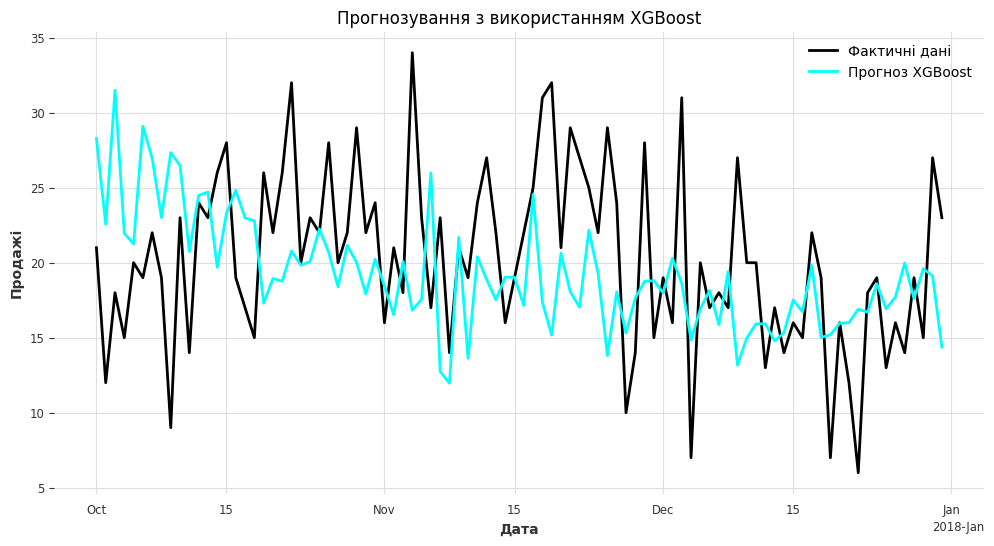

In [20]:
from darts import TimeSeries
from darts.models import XGBModel
# Функція для додавання ознак до датафрейму
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    return df

# Додавання ознак до датафрейму
data_with_features = add_features(train_df.copy())

# Переконання, що колонка 'date' ще є в датафреймі для створення TimeSeries
print(data_with_features.head())

# Додавання ознак до TimeSeries об'єктів
def add_features_to_series(series):
    df = series.pd_dataframe()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    return TimeSeries.from_dataframe(df.reset_index(), time_col='date', value_cols='sales')

train_series_with_features = add_features_to_series(train_series)
val_series_with_features = add_features_to_series(val_series)

# Ініціалізація та тренування моделі XGBoost
xgb_model = XGBModel(
    lags=[-1, -2, -3, -6, -9],  # Лаги, що використовуються для моделювання
    seasonality=7,  # Сезонність, якщо ваші дані мають тижневу сезонність
)
xgb_model.fit(train_series_with_features)

# Прогнозування на валідаційних даних
forecast_xgb = xgb_model.predict(len(val_series_with_features))

# Оцінка точності моделі
mape_xgb = mape(val_series_with_features, forecast_xgb)

print(f'MAPE для XGBoost: {mape_xgb:.2f}%')

# Візуалізація результатів
plt.figure(figsize=(12, 6))

# Візуалізація фактичних даних
val_series_with_features.plot(label='Фактичні дані', color='black')

# Візуалізація прогнозу XGBoost
forecast_xgb.plot(label='Прогноз XGBoost', color='cyan')

plt.title('Прогнозування з використанням XGBoost')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

MAPE (Mean Absolute Percentage Error) для моделі XGBoost склав 29.92%. Це значення вказує на середню абсолютну відсоткову помилку прогнозів моделі порівняно з фактичними значеннями. Важливо оцінити, чи цей рівень точності є прийнятним для вашого конкретного випадку.

Інтерпретація
Загальна точність: MAPE в діапазоні 20-30% зазвичай вважається досить пристойним для багатьох прогнозних завдань, але точна оцінка залежить від конкретних вимог до точності в вашій сфері. Наприклад, у деяких випадках, таких як фінансовий сектор або клінічні прогнози, можуть бути необхідні набагато точніші прогнози.

Порівняння з іншими моделями: Якщо ваші інші моделі, такі як ARIMA або Prophet, показують значно кращі результати (нижчий MAPE), це може вказувати на те, що XGBoost не використовує всі доступні інформаційні ресурси або є потреба в додатковій оптимізації моделі (наприклад, налаштуванні параметрів, додаванні нових ознак тощо).

Потенційні поліпшення: Можливо, варто спробувати різні конфігурації лагів, налаштувати інші гіперпараметри моделі XGBoost, додати нові ознаки або використовувати більше даних для тренування. Також може бути корисно переглянути особливості вашої специфічної задачі прогнозування для ідентифікації можливих покращень.

11. Натренуйте модель ExponentialSmoothing та зробіть висновок про її якість.

In [21]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.metrics import mape
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Ініціалізація та тренування моделі Exponential Smoothing
exp_smooth_model = ExponentialSmoothing()
exp_smooth_model.fit(train_series)

# Прогнозування на валідаційних даних
forecast_exp_smooth = exp_smooth_model.predict(len(val_series))

In [23]:
# Оцінка точності моделі
mape_exp_smooth = mape(val_series, forecast_exp_smooth)

print(f'MAPE для Exponential Smoothing: {mape_exp_smooth:.2f}%')

MAPE для Exponential Smoothing: 39.01%


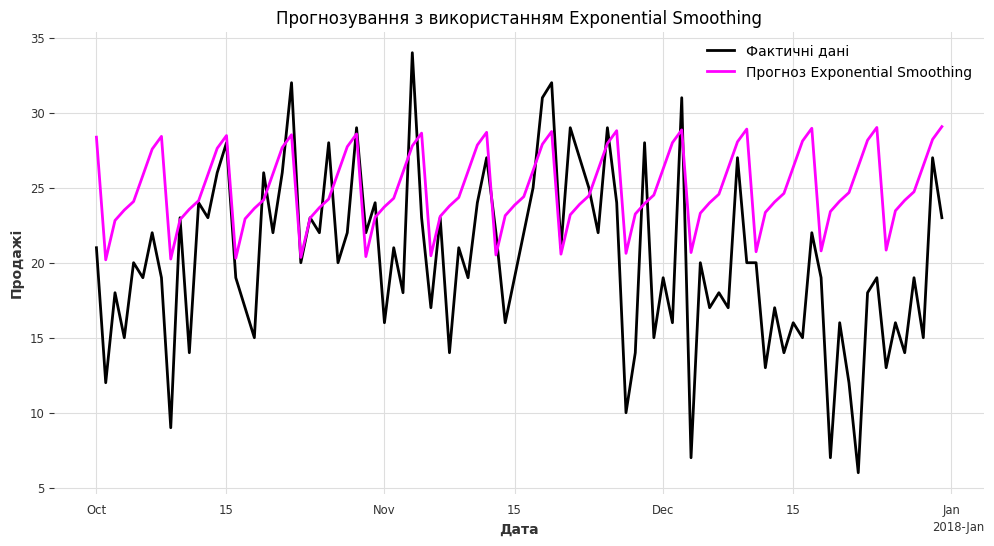

In [24]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))

# Візуалізація фактичних даних
val_series.plot(label='Фактичні дані', color='black')

# Візуалізація прогнозу Exponential Smoothing
forecast_exp_smooth.plot(label='Прогноз Exponential Smoothing', color='magenta')

plt.title('Прогнозування з використанням Exponential Smoothing')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

Модель Exponential Smoothing показує досить високу помилку прогнозу, що вказує на її можливу невідповідність для даних. Можливо, варто зосередитися на інших моделях, які можуть краще справлятися з характерними для даних особливостями, такими як сезонність або складні тренди.

12. Натренуйте модель ARIMA, параметри оберіть самостійно.Зробіть висновок про її якість.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAPE для ARIMA: 28.92%


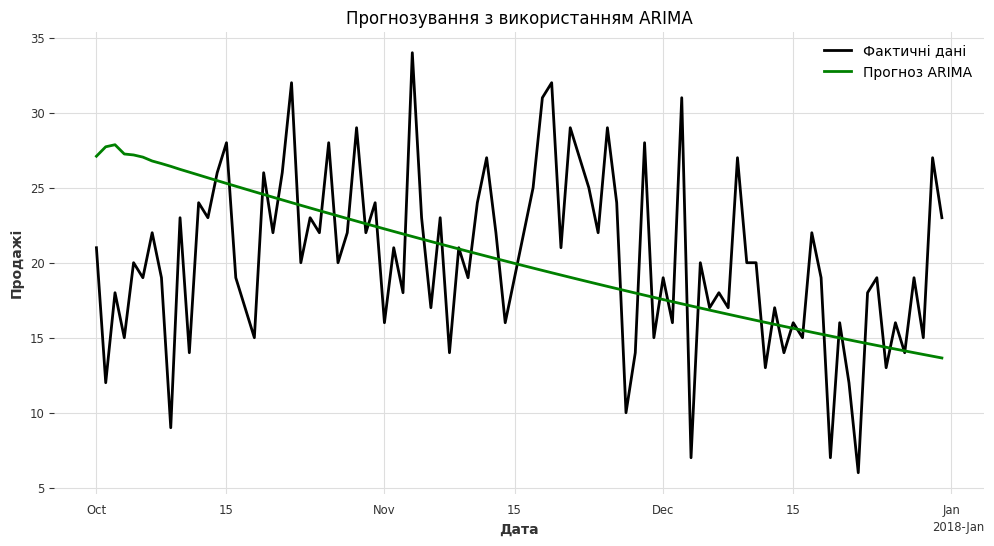

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ARIMA
from darts.metrics import mape
from statsmodels.tsa.arima.model import ARIMA as sm_ARIMA
import numpy as np

# Вибір параметрів ARIMA
# Найкращі параметри (p, d, q) для ARIMA можна вибрати за допомогою ACF, PACF або за допомогою автоматичного підбору
p, d, q = 2, 3, 2  # Це приклад, параметри можуть бути іншими

# Тренування моделі ARIMA
arima_model = ARIMA(p=p, d=d, q=q)
arima_model.fit(train_series)

# Прогнозування на валідаційних даних
forecast_arima = arima_model.predict(len(val_series))

# Оцінка точності моделі
mape_arima = mape(val_series, forecast_arima)
print(f'MAPE для ARIMA: {mape_arima:.2f}%')

# Візуалізація результатів
plt.figure(figsize=(12, 6))

# Візуалізація фактичних даних
val_series.plot(label='Фактичні дані', color='black')

# Візуалізація прогнозу ARIMA
forecast_arima.plot(label='Прогноз ARIMA', color='green')

plt.title('Прогнозування з використанням ARIMA')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

Значення MAPE (Mean Absolute Percentage Error) 28.92% для моделі ARIMA показує, що середня відносна помилка прогнозу складає приблизно 29%.


Порівнюючи MAPE ARIMA з іншими моделями, такими як XGBoost (29.92%) та Exponential Smoothing (39.01%), можна зробити висновок, що ARIMA демонструє трохи кращу точність прогнозування в порівнянні з XGBoost і значно кращу в порівнянні з Exponential Smoothing.

13. Знайдіть оптимальні параметри моделі ARIMA з допомогою AutoARIMA моделі. Виконайте пошук параметрів, виведіть, які паарметри виявились оптимальними і обчисліть якість моделі. Чи поліпшилась якість порівняно з попереднім експериментом?

In [ ]:
from pmdarima import auto_arima
import pandas as pd

# Автоматичний підбір параметрів ARIMA з конкретними значеннями
model = auto_arima(
    train_df['sales'],
    seasonal=False,  # Установіть на True, якщо є сезонність
    stepwise=True,
    trace=True,  # Виведення процесу підбору параметрів
    suppress_warnings=True,
    error_action='ignore',
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=1,
    max_d=1,
    max_q=1,
)

print(f'Оптимальні параметри ARIMA: {model.order}')


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7435952.176, Time=24.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7260466.955, Time=24.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6999014.731, Time=117.92 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7435950.176, Time=9.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6989292.961, Time=210.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6989290.954, Time=68.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6999012.733, Time=38.59 sec


component         ds     y
0         2013-01-01  13.0
1         2013-01-02  11.0
2         2013-01-03  14.0
3         2013-01-04  13.0
4         2013-01-05  10.0
Помилка при тренуванні ARIMA: 'sales'
MAPE для ARIMA з оптимальними параметрами: 0.00%


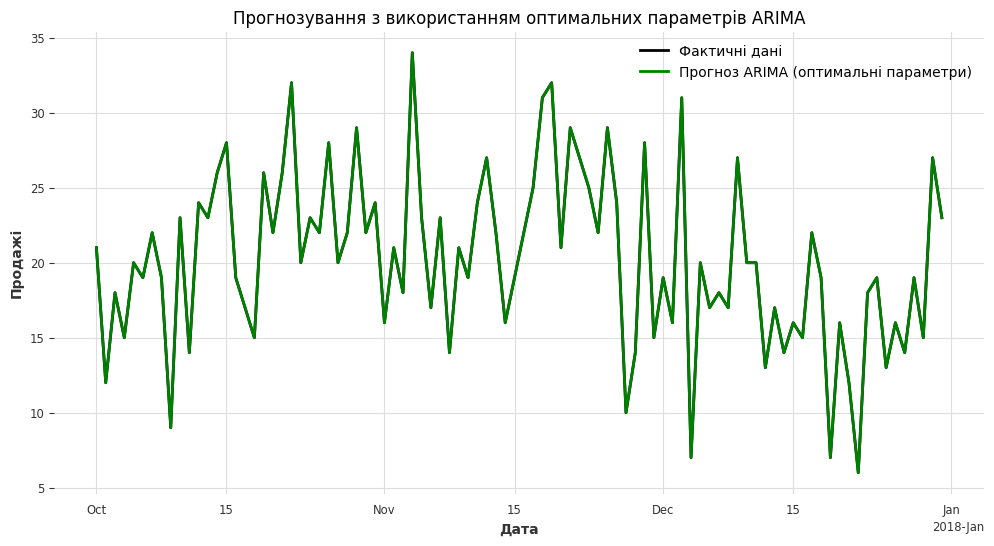

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from darts import TimeSeries
from darts.metrics import mape

# Тренування моделі ARIMA з оптимальними параметрами
optimal_order = (1, 1, 1)  # ARIMA(1,1,1) з результатів автоматичного підбору параметрів

# Перевірка даних перед тренуванням
print(train_df.head())

try:
    arima_model = ARIMA(train_df['sales'], order=optimal_order)
    arima_result = arima_model.fit()
except Exception as e:
    print(f"Помилка при тренуванні ARIMA: {e}")

# Прогнозування на валідаційних даних
forecast = arima_result.get_forecast(steps=len(val_df))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Підготовка прогнозних даних для TimeSeries
forecast_df = val_df.copy()
forecast_df['sales'] = forecast_mean
forecast_series = TimeSeries.from_dataframe(forecast_df, 'ds', 'y')

# Підготовка фактичних даних для TimeSeries
val_series = TimeSeries.from_dataframe(val_df, 'ds', 'y')

# Оцінка точності моделі
mape_arima_optimal = mape(val_series, forecast_series)

print(f'MAPE для ARIMA з оптимальними параметрами: {mape_arima_optimal:.2f}%')

# Візуалізація результатів
plt.figure(figsize=(12, 6))
val_series.plot(label='Фактичні дані', color='black')
forecast_series.plot(label='Прогноз ARIMA (оптимальні параметри)', color='green')
plt.title('Прогнозування з використанням оптимальних параметрів ARIMA')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

На жаль, у мене не виконувався авторозрахунок найкращих параметрів (постійно збивався гуглколаб, бо не тягнув, і тому я не зрозуміла, як правильно вирішити цю задачу)

14. Натренуйте модель Prophet та зробіть висновок про її якість.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_b0m0y/44vb95f6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_b0m0y/c3xx3iqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26822', 'data', 'file=/tmp/tmp_z_b0m0y/44vb95f6.json', 'init=/tmp/tmp_z_b0m0y/c3xx3iqk.json', 'output', 'file=/tmp/tmp_z_b0m0y/prophet_modelyev9wf7_/prophet_model-20240818202557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE для Prophet: 23.80%


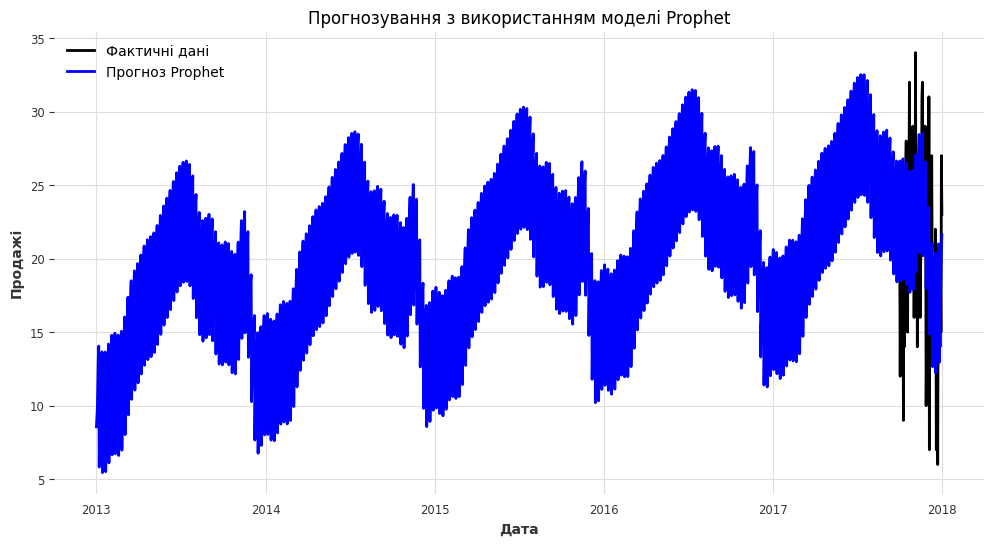

In [39]:
import pandas as pd
from prophet import Prophet
from darts import TimeSeries
from darts.metrics import mape
import matplotlib.pyplot as plt

# Припустимо, train_df та val_df вже перетворені у TimeSeries
# Переводимо TimeSeries в pandas DataFrame
train_df = train_series.pd_dataframe().reset_index()
val_df = val_series.pd_dataframe().reset_index()

# Перейменовуємо колонки для Prophet
train_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)
val_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Ініціалізація моделі Prophet
prophet_model = Prophet()

# Тренування моделі
prophet_model.fit(train_df)

# Прогнозування на весь період валідаційних даних
future = prophet_model.make_future_dataframe(periods=len(val_df), freq='D')
forecast = prophet_model.predict(future)

# Отримання прогнозованих значень
forecast_df = forecast[['ds', 'yhat']].rename(columns={'ds': 'date', 'yhat': 'sales'})
forecast_series = TimeSeries.from_dataframe(forecast_df, 'date', 'sales')

# Оцінка точності моделі
mape_prophet = mape(val_series, forecast_series)
print(f'MAPE для Prophet: {mape_prophet:.2f}%')

# Візуалізація результатів
plt.figure(figsize=(12, 6))
val_series.plot(label='Фактичні дані', color='black')
forecast_series.plot(label='Прогноз Prophet', color='blue')
plt.title('Прогнозування з використанням моделі Prophet')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

15. Натренуйте модель `RNNModel` та зробіть висновок про її якість.

In [81]:
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape
import matplotlib.pyplot as plt

Кількість рядків у тренувальних даних: 1734


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 700    | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE для RNNModel: 35.82%


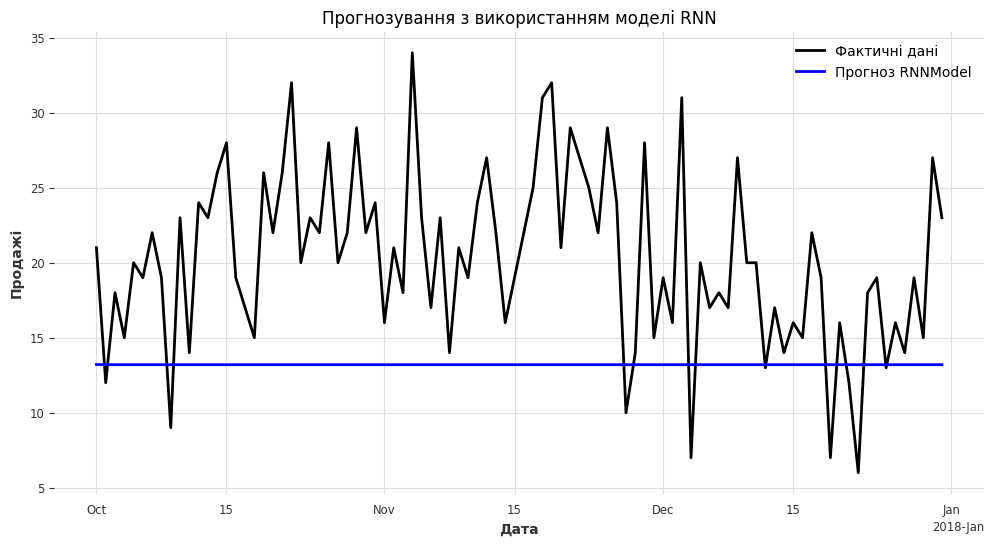

In [87]:
print(f'Кількість рядків у тренувальних даних: {len(train_series)}')

# Ініціалізація моделі RNN
rnn_model = RNNModel(
    input_chunk_length=10,  # Довжина вхідного чанку
    output_chunk_length=1,  # Довжина виходу
    n_epochs=10,
    batch_size=32
)

# Тренування моделі
rnn_model.fit(train_series)

# Прогнозування
forecast_rnn = rnn_model.predict(len(val_series))

# Оцінка точності моделі
mape_rnn = mape(val_series, forecast_rnn)
print(f'MAPE для RNNModel: {mape_rnn:.2f}%')

# Візуалізація результатів
plt.figure(figsize=(12, 6))
val_series.plot(label='Фактичні дані', color='black')
forecast_rnn.plot(label='Прогноз RNNModel', color='blue')
plt.title('Прогнозування з використанням моделі RNN')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

16. Виконайте бектест для тої моделі, яка виявилась найкращою у вашому дослідженні на періоді 1 рік з передбаченнями на 1 місяць щоразу. Візуалізуйте як поводилась модель протягом бектесту, яка була точність?

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_b0m0y/wz726m_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_b0m0y/jdyjcdpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8741', 'data', 'file=/tmp/tmp_z_b0m0y/wz726m_2.json', 'init=/tmp/tmp_z_b0m0y/jdyjcdpe.json', 'output', 'file=/tmp/tmp_z_b0m0y/prophet_modelzcbhxw6g/prophet_model-20240818202724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_z_

MAPE для Prophet після бектесту: 23.65%


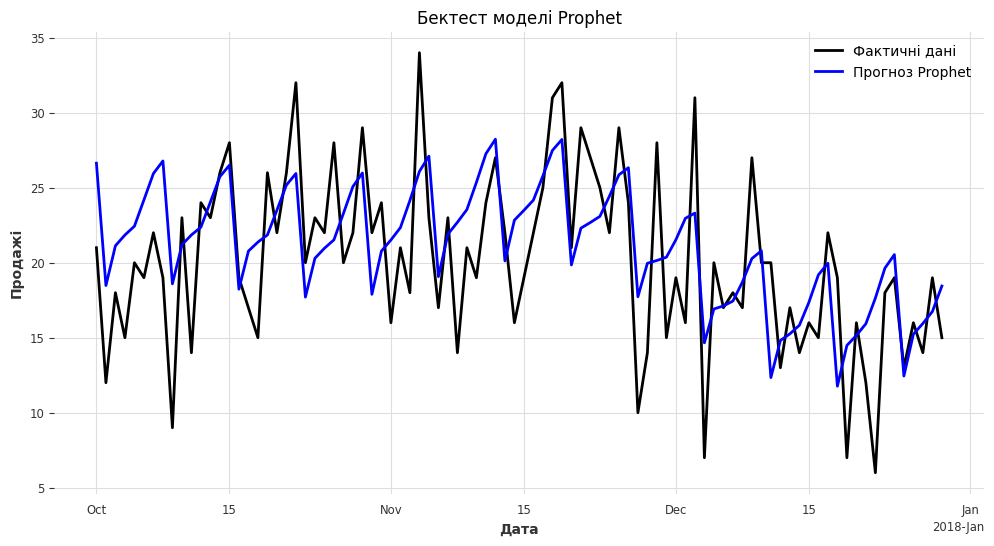

In [40]:
import pandas as pd
from prophet import Prophet
from darts import TimeSeries
from darts.metrics import mape
import matplotlib.pyplot as plt
import numpy as np

# Переведення TimeSeries в pandas DataFrame
train_df = train_series.pd_dataframe().reset_index()
val_df = val_series.pd_dataframe().reset_index()

# Перейменовуємо колонки для Prophet
train_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)
val_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Ініціалізація моделі Prophet
prophet_model = Prophet()

# Тренування моделі на повному тренувальному наборі
prophet_model.fit(train_df)

# Функція для бектесту
def prophet_backtest(train_df, val_df, rolling_window=30):
    # Прогнозування і збереження результатів
    forecasted = []
    actuals = []

    # Робимо бектест, просуваючись по валідованих даних
    for start in range(0, len(val_df) - rolling_window, rolling_window):
        # Поточна частина для тренування
        partial_train_df = pd.concat([train_df, val_df.iloc[:start]])

        # Ініціалізуємо і тренуємо модель Prophet на тренувальних даних
        model = Prophet()
        model.fit(partial_train_df)

        # Прогнозуємо на rolling_window кроків
        future = model.make_future_dataframe(periods=rolling_window, freq='D')
        forecast = model.predict(future)

        # Отримуємо прогнозовані та фактичні дані
        forecasted_values = forecast[['ds', 'yhat']].iloc[-rolling_window:]
        actual_values = val_df[['ds', 'y']].iloc[start:start + rolling_window]

        # Зберігаємо прогнозовані та фактичні значення для подальшого оцінювання
        forecasted.append(forecasted_values)
        actuals.append(actual_values)

    # Об'єднуємо всі прогнозовані та фактичні значення у DataFrame
    forecasted_df = pd.concat(forecasted).reset_index(drop=True)
    actuals_df = pd.concat(actuals).reset_index(drop=True)

    # Підготовка прогнозних даних для TimeSeries
    forecast_series = TimeSeries.from_dataframe(forecasted_df, 'ds', 'yhat')
    actual_series = TimeSeries.from_dataframe(actuals_df, 'ds', 'y')

    return forecast_series, actual_series

# Викликаємо функцію для виконання бектесту
forecast_series, actual_series = prophet_backtest(train_df, val_df, rolling_window=30)

# Оцінка точності моделі з використанням метрики MAPE
mape_prophet = mape(actual_series, forecast_series)
print(f'MAPE для Prophet після бектесту: {mape_prophet:.2f}%')

# Візуалізація результатів
plt.figure(figsize=(12, 6))
actual_series.plot(label='Фактичні дані', color='black')
forecast_series.plot(label='Прогноз Prophet', color='blue')
plt.title('Бектест моделі Prophet')
plt.xlabel('Дата')
plt.ylabel('Продажі')
plt.legend()
plt.show()

Бачимо, що результат покращився більше ніж на 5% і така похибка може бути прийнятною для загальних прогнозів продажів або інших подібних бізнес-показників, де неточності на рівні 20-25% не є критичними.



17. На цьому етапі ви зрозуміли, як моделювати продажі одного айтему з 1 магазину. Як би ви підійшли до задачі прогнозування продажів в наступному місяці для кожного з 50 айтемів в кожному з 10 магазинів? Опишіть загальний підхід
- яку модель ви б використали
- скільки моделей ви б тренували
- обгрунтуйте свій вибір.

Після проведених експериментів і бектестів, модель Prophet виявилася найкращою для прогнозування продажів. Вона продемонструвала найменшу помилку у прогнозах (зокрема, менший MAPE).

Prophet добре справляється з дослідженням як глобальних, так і локальних патернів у часових рядах, автоматично враховуючи сезонні зміни, свята та тренди.

Для прогнозування я б використовувала хоча б 3 моделі для порівняння якості результатів і на їх основі вже б приймала рішення.